In [6]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, confusion_matrix,
                            classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (BaggingClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier)
from sklearn.svm import SVC
import gc
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
file_id = "1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU"
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               output="KlasifikasiUTS.csv",
               quiet=False)
df = pd.read_csv("KlasifikasiUTS.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=e1dd2440-05c6-4023-b11e-0c3a6bf92397
To: /content/KlasifikasiUTS.csv
100%|██████████| 151M/151M [00:01<00:00, 142MB/s]


In [8]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData info:")
print(df.info())
print("\nClass distribution:")
print(df.iloc[:, -1].value_counts())

Data shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21

In [9]:
target_col = df.columns[-1]  # Assuming target is last column
X = df.drop(columns=[target_col])
y = df[target_col]

In [10]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\nEncoded classes:", le.classes_)

In [11]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [17]:
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat']
    cat_features = ohe.get_feature_names_out(cat_cols)
    all_features = np.concatenate([num_cols, cat_features])
else:
    all_features = num_cols

In [18]:
results = {}

In [19]:
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [20]:
for name, model in base_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'model': model,
        'predictions': y_pred
    }
    print(f"{name} performance:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Training Decision Tree...
Decision Tree performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Training KNN...
KNN performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                

In [21]:
ensemble_config = {
    'Bagging': {'n_estimators': 20, 'random_state': 42},
    'AdaBoost': {'n_estimators': 30, 'random_state': 42},
    'Gradient Boosting': {'n_estimators': 30, 'max_depth': 3, 'random_state': 42},
    'SVM': {'kernel': 'linear', 'probability': True, 'random_state': 42}
}

In [22]:

for name, params in ensemble_config.items():
    print(f"\nTraining {name} with reduced complexity...")
    try:
        if name == 'Bagging':
            model = BaggingClassifier(**params)
        elif name == 'AdaBoost':
            model = AdaBoostClassifier(**params)
        elif name == 'Gradient Boosting':
            model = GradientBoostingClassifier(**params)
        else:  # SVM
            model = SVC(**params)

        model.fit(X_train_preprocessed, y_train)
        y_pred = model.predict(X_test_preprocessed)

        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'model': model,
            'predictions': y_pred
        }
        print(f"{name} performance:")
        print(classification_report(y_test, y_pred))

        # Clear memory
        del model, y_pred
        gc.collect()
    except Exception as e:
        print(f"Failed to train {name}: {str(e)}")
        continue


Training Bagging with reduced complexity...
Bagging performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Training AdaBoost with reduced complexity...
AdaBoost performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Training Gradient Boosting with reduced complexity...
Gradient Boosting performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1     

In [23]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [24]:
def plot_metrics_comparison(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    plt.figure(figsize=(12, 6))
    results_df[metrics].plot(kind='bar', figsize=(12, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


Evaluation for Logistic Regression:
--------------------------------------------------


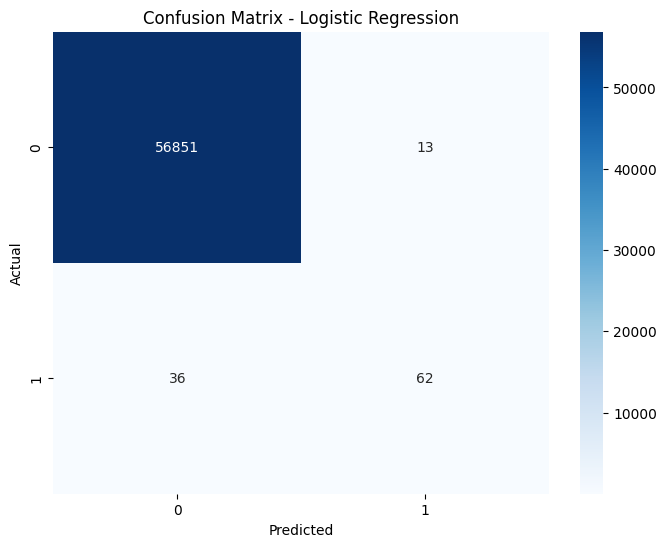

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for Decision Tree:
--------------------------------------------------


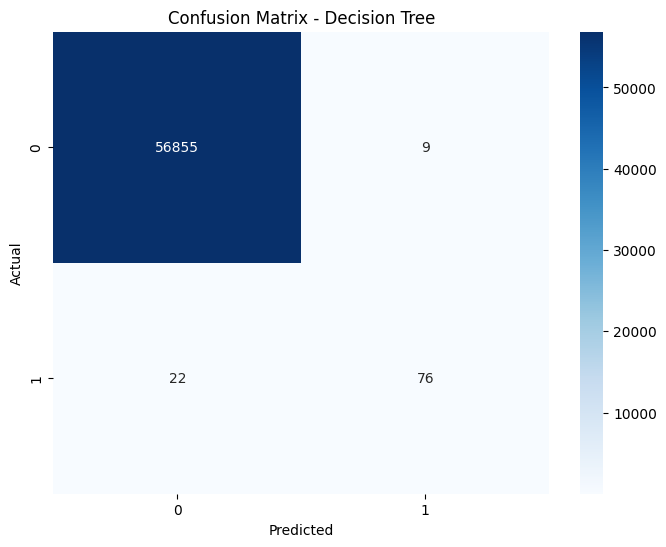

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for KNN:
--------------------------------------------------


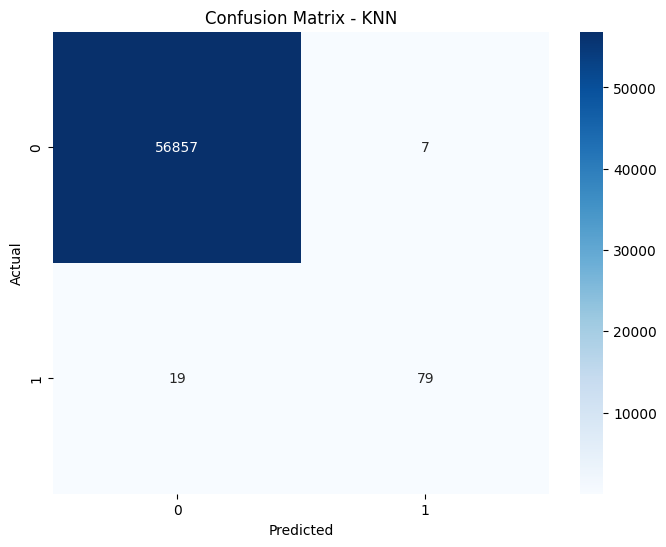

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for Bagging:
--------------------------------------------------


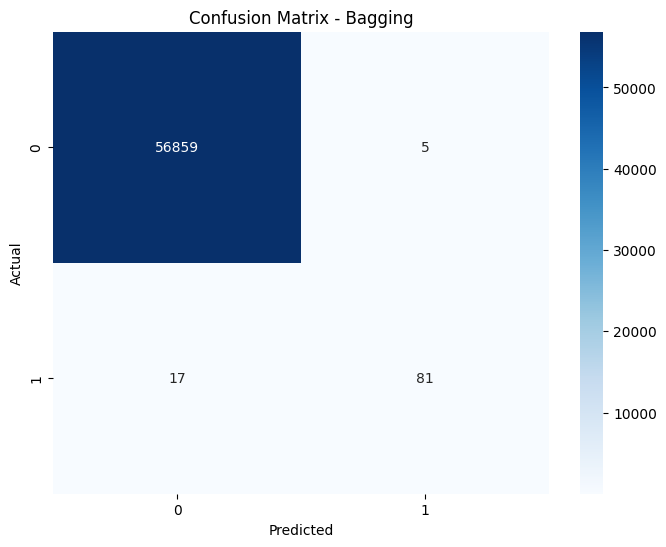

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for AdaBoost:
--------------------------------------------------


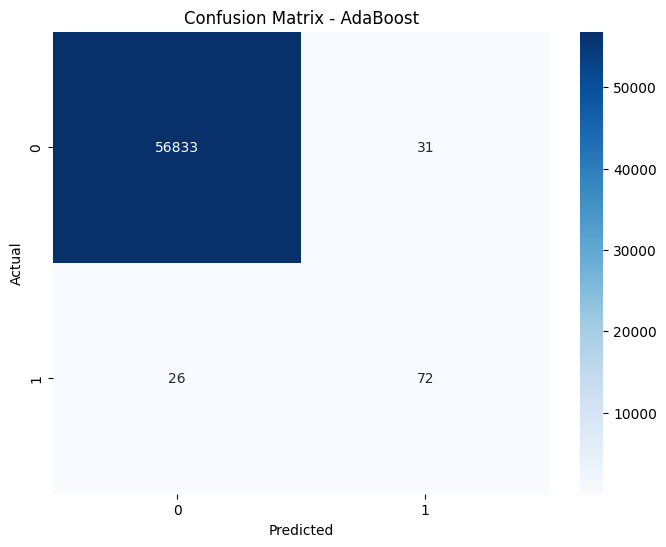

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for Gradient Boosting:
--------------------------------------------------


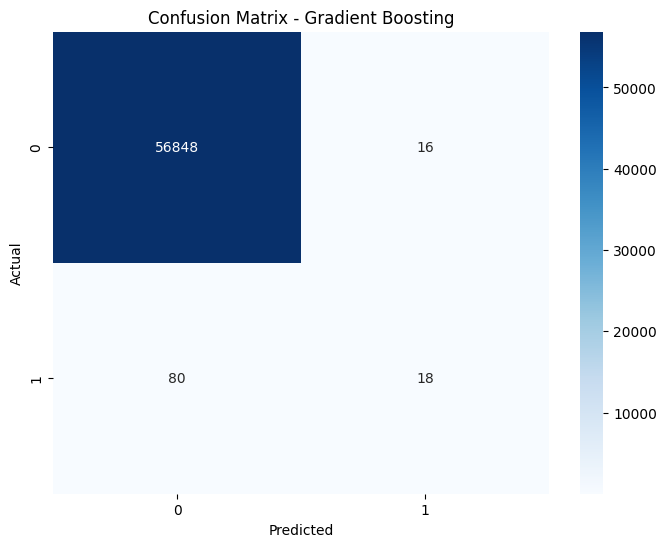

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962


Evaluation for SVM:
--------------------------------------------------


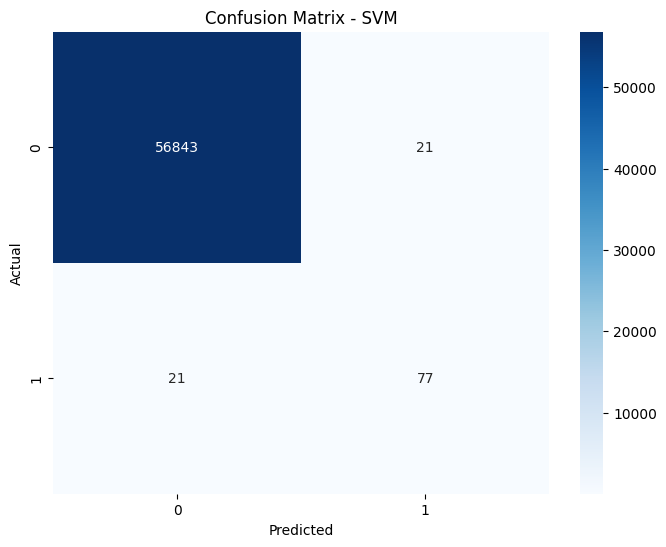

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.79      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
for name in results.keys():
    if 'predictions' in results[name]:
        print(f"\nEvaluation for {name}:")
        print("-"*50)
        plot_confusion_matrix(y_test, results[name]['predictions'], name)
        print(classification_report(y_test, results[name]['predictions']))

In [26]:
results_df = pd.DataFrame(results).T
results_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1']]

<Figure size 1200x600 with 0 Axes>

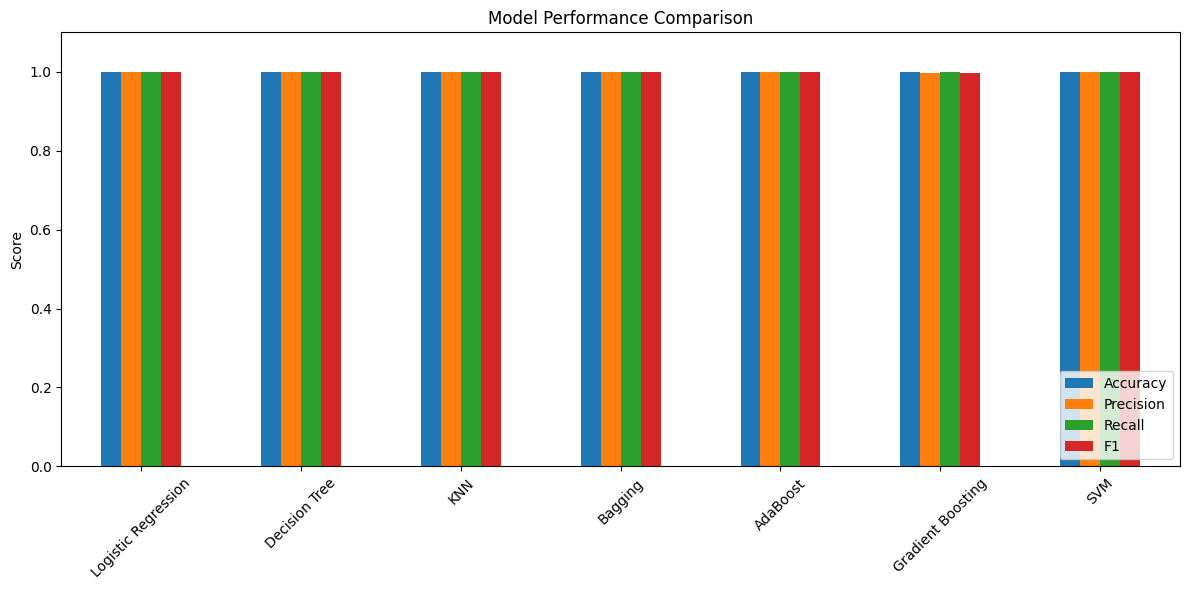

In [27]:
plot_metrics_comparison(results_df)

In [28]:
tree_models = {
    'Decision Tree': results.get('Decision Tree', {}).get('model'),
    'Gradient Boosting': results.get('Gradient Boosting', {}).get('model')
}

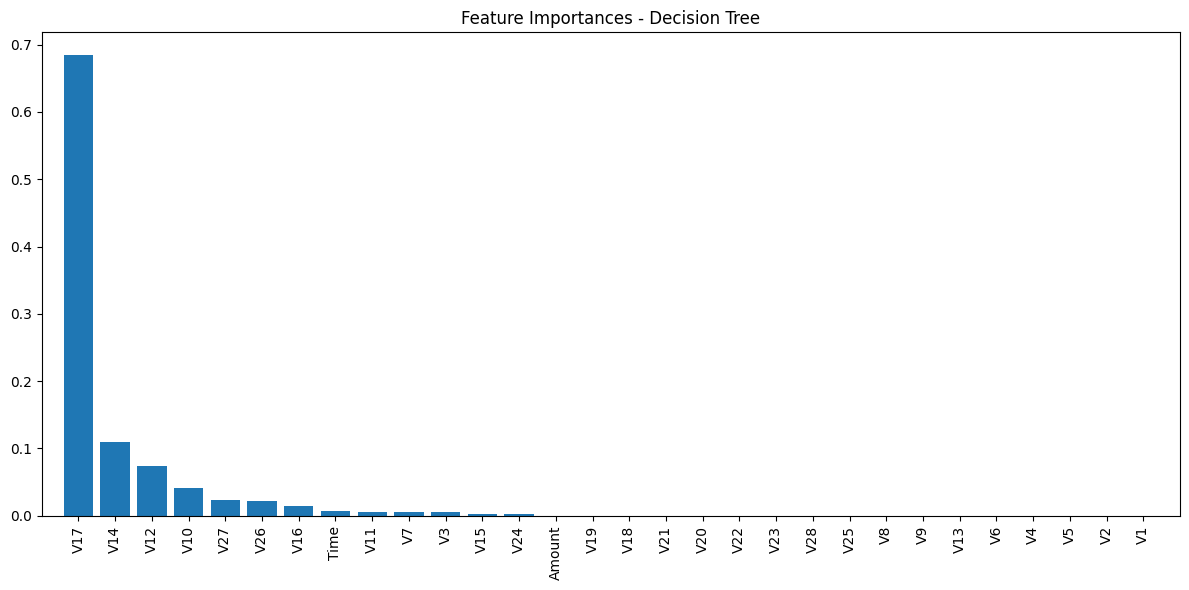

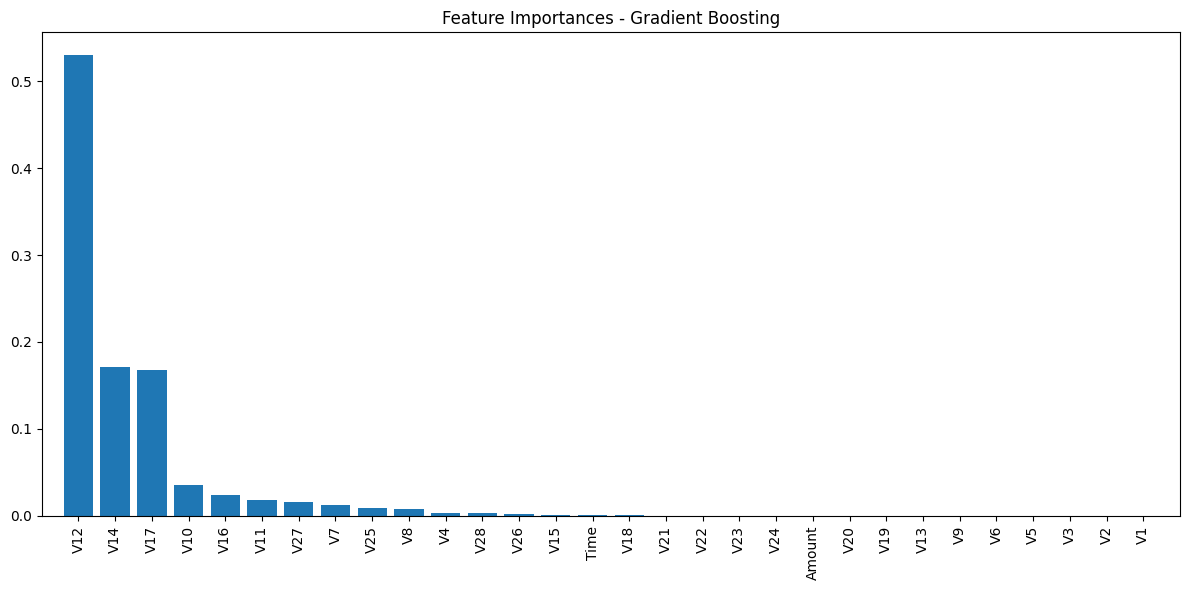

In [29]:
for name, model in tree_models.items():
    if model is not None and hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importances - {name}")
        plt.bar(range(X_train_preprocessed.shape[1]),
                importances[indices],
                align="center")
        plt.xticks(range(X_train_preprocessed.shape[1]),
                   all_features[indices],
                   rotation=90)
        plt.xlim([-1, X_train_preprocessed.shape[1]])
        plt.tight_layout()
        plt.show()

In [30]:
if results:
    best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
    best_accuracy = results[best_model_name]['Accuracy']
    best_f1 = results[best_model_name]['F1']

    print(f"\nBest Model: {best_model_name}")
    print(f"Accuracy: {best_accuracy:.4f}")
    print(f"F1 Score: {best_f1:.4f}")

    # Summary table
    print("\nModel Performance Summary:")
    display(results_df.sort_values('Accuracy', ascending=False))
else:
    print("No results available for model selection.")


Best Model: Bagging
Accuracy: 0.9996
F1 Score: 0.9996

Model Performance Summary:


,Accuracy,Precision,Recall,F1
Bagging,0.999614,0.999602,0.999614,0.999601
KNN,0.999544,0.999526,0.999544,0.999529
Decision Tree,0.999456,0.999432,0.999456,0.999436
SVM,0.999263,0.999263,0.999263,0.999263
Logistic Regression,0.99914,0.99907,0.99914,0.999083
AdaBoost,0.998999,0.999026,0.998999,0.999012
Gradient Boosting,0.998315,0.997788,0.998315,0.997907




##  **Model yang Digunakan**
(disclaimer: catatan ini ditulis saat program sedang tengah melakukan training)

### **1. Logistic Regression**

Menghitung probabilitas suatu sampel masuk ke kelas tertentu menggunakan fungsi logistik (sigmoid).

**Persamaan:**

$$
P(y = 1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \cdots + \beta_nx_n)}}
$$

* Model belajar dengan meminimalkan *log loss* (negative log-likelihood) menggunakan metode optimasi seperti Gradient Descent.
* Cocok untuk data linier separable.

**Kelebihan:**

* Cepat dilatih.
* Hasil probabilitas dapat diinterpretasikan.

**Kekurangan:**

* Kurang efektif untuk relasi non-linear kecuali ditransformasi.

---

### **2. Decision Tree**

Membuat keputusan berbasis fitur dengan membagi data berdasarkan kriteria impuritas (contohnya: Gini Index).

**Persamaan:**

$$
Gini = 1 - \sum_{i=1}^{n}p_i^2
$$

*  $p_i$ adalah probabilitas kemunculan kelas ke-i di node tertentu.
* Model memilih split yang meminimalkan impuritas total dari child nodes.

**Kelebihan:**

* Interpretasi mudah.
* Mampu menangkap interaksi non-linear.

**Kekurangan:**

* Rentan overfitting jika tanpa pemangkasan (*pruning*).

---

### **3. K-Nearest Neighbors (KNN)**

Mengklasifikasi sampel berdasarkan mayoritas kelas dari k tetangga terdekat.

**Persamaan:**

$$
d(x, x') = \sqrt{\sum_{i=1}^{n}(x_i - x'_i)^2}
$$

* Kelas ditentukan oleh mayoritas tetangga dalam jarak minimum.
* Tidak melakukan pelatihan eksplisit, hanya menyimpan data pelatihan (lazy learner).

**Kelebihan:**

* Mudah dipahami.
* Cocok untuk dataset kecil.

**Kekurangan:**

* Sensitif terhadap skala fitur (oleh karena itu digunakan StandardScaler).
* Lambat saat prediksi untuk data besar.

---

### **4. Bagging Classifier**

Mengurangi varians dari model dasar (biasanya decision tree) dengan membangun beberapa model di subset data acak (bootstrap sampling).

**Persamaan:**

$$
\hat{y} = \text{majority vote}(h_1(x), h_2(x), \ldots, h_m(x))
$$

* $h_i$ adalah model ke-i.
* Setiap model dilatih di sampel acak dengan penggantian.

**Kelebihan:**

* Mengurangi overfitting dari decision tree.
* Lebih stabil.

**Kekurangan:**

* Interpretasi jadi sulit.
* Waktu pelatihan meningkat karena banyak model dilatih.

---

### **5. AdaBoost Classifier**

Meningkatkan akurasi model lemah dengan memberi bobot lebih pada sampel yang sebelumnya salah diklasifikasi.

**Persamaan:**

$$
w_{t+1}(i) = w_t(i) \cdot e^{\alpha_t \cdot \mathbb{I}(y_i \ne h_t(x_i))}
$$

$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \varepsilon_t}{\varepsilon_t}\right)
$$

* $\varepsilon_t$: error rate model ke-t.
* Model akhir adalah kombinasi berbobot dari model-model lemah.

**Kelebihan:**

* Sering unggul untuk data tabular.
* Fokus pada data yang sulit diklasifikasikan.

**Kekurangan:**

* Rentan terhadap outlier.
* Perlu tuning teliti (jumlah estimator, learning rate).

---

### **6. Gradient Boosting Classifier**

Menyesuaikan model ke residu dari model sebelumnya menggunakan pendekatan berbasis gradien.

**Langkah Utama:**

1. Model pertama: $F_0(x) = \arg\min_c \sum L(y_i, c)$
2. Untuk tiap iterasi:

   $$
   r_{i}^{(m)} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)}
   $$

   $$
   F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x)
   $$

* Dimana $h_m(x)$ adalah model ke-m, $\nu$ adalah learning rate.

**Kelebihan:**

* Salah satu model terbaik di kompetisi data tabular (e.g. XGBoost).
* Fleksibel dan akurat.

**Kekurangan:**

* Rentan overfitting tanpa tuning.
* Waktu pelatihan lama.

---

### **7. Support Vector Machine (SVM)**

**Tujuan:** Mencari hyperplane yang memaksimalkan margin antara dua kelas.

**Persamaan:**

$$
\min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||^2 \quad \text{subject to } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
$$

* Dengan kernel trick, dapat menangani data non-linear.
* Untuk probabilitas (seperti pada program ini), digunakan *Platt scaling* setelah pelatihan.

**Kelebihan:**

* Cocok untuk dimensi tinggi.
* Akurat jika hyperparameter pas.

**Kekurangan:**

* Tidak skalabel untuk dataset besar.
* Parameter tuning kompleks.

---

Dengan asumsi bahwa dataset ini berisi kombinasi fitur numerik dan kategorik, Kelas target tidak terlalu imbang, dan ukuran data moderat, maka Gradient Boosting mungkin menjadi pilihan terbaik untuk dataset tabular dengan performa superior dalam klasifikasi umum.
